In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

models = ["LANTERN", "Smiles-Bert", "TEINet", "ChemBERTa", "TITAN", "ERGO II", "NetTCR", "DLpctr", "Imrex"]


auc_roc_data = {
    "Gen NA": [0.88, 0.659, 0.97, 0.7571, 0.5, 0.613, 0.605, 0.52, 0.685],
    "Gen RN": [0.66, 0.556, 0.52, 0.6485, 0.525, 0.512, 0.534, 0.564, 0.66],
    "Original NA": [0.901, 0.658, 0.97, 0.7314, 0.82, 0.623, 0.593, 0.666, 0.76],
    "Original RN": [0.57, 0.573, 0.53, 0.53, 0.501, 0.521, 0.535, 0.501, 0.562],
}

plt.show()

In [2]:
auc_roc_df = pd.DataFrame(auc_roc_data, index=models)

average_na = auc_roc_df[["Gen NA", "Original NA"]].mean(axis=1)
average_rn = auc_roc_df[["Gen RN", "Original RN"]].mean(axis=1)


auc_roc_df["Average NA"] = average_na
auc_roc_df["Average RN"] = average_rn

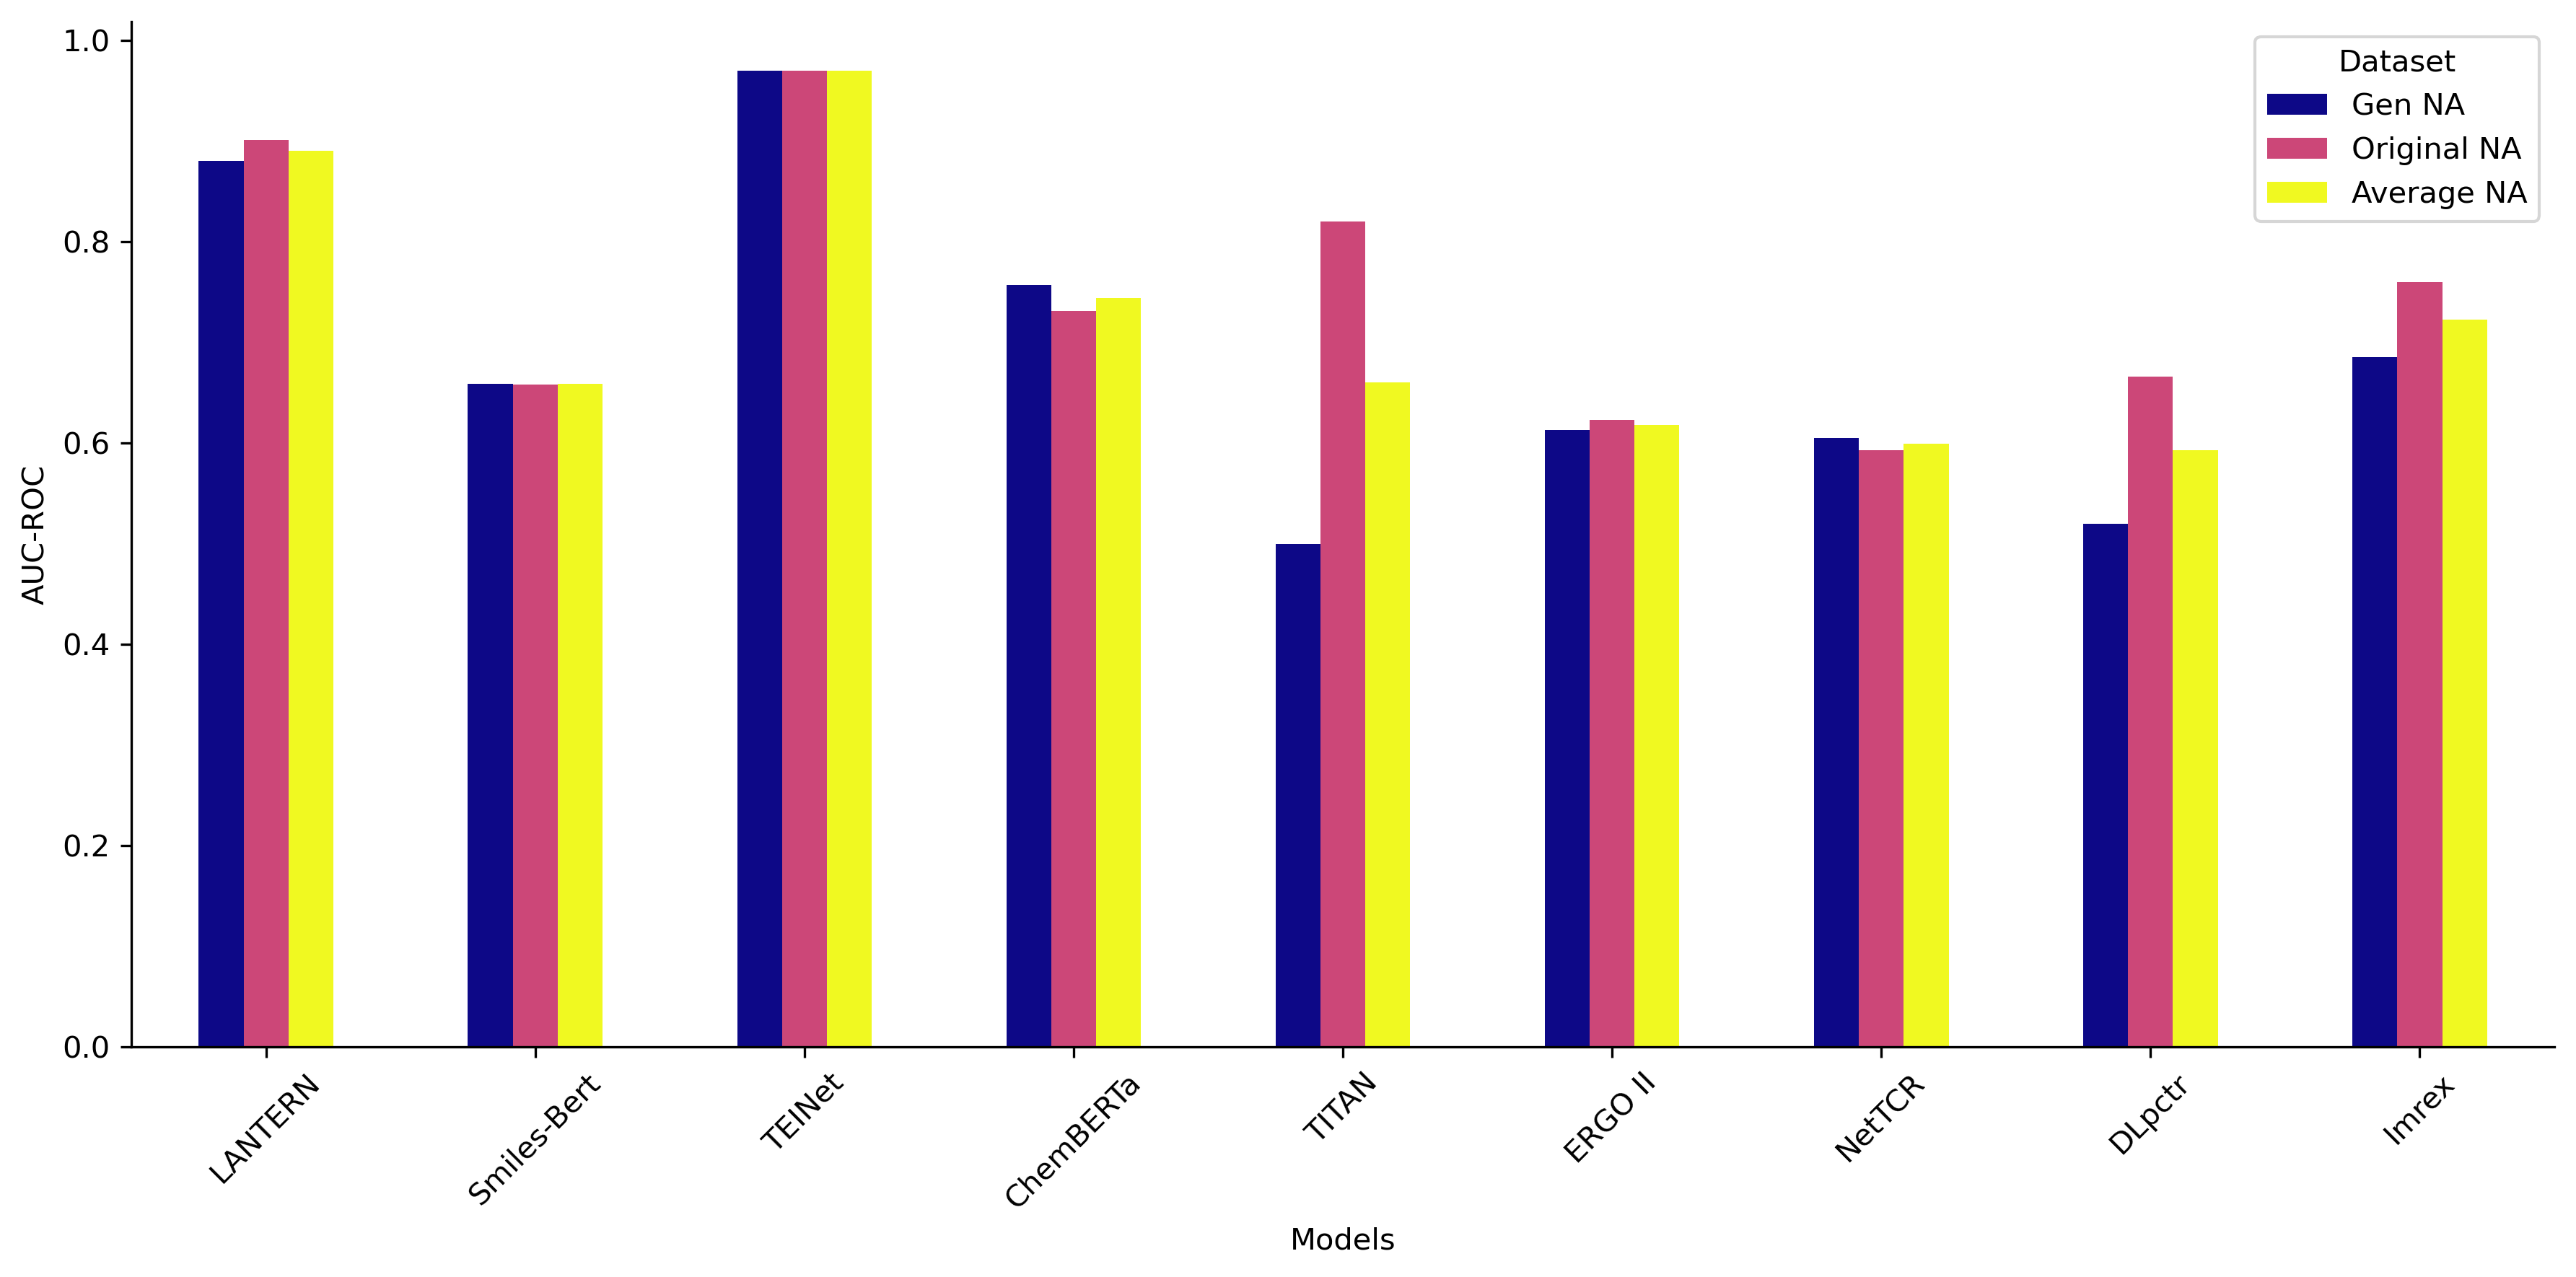

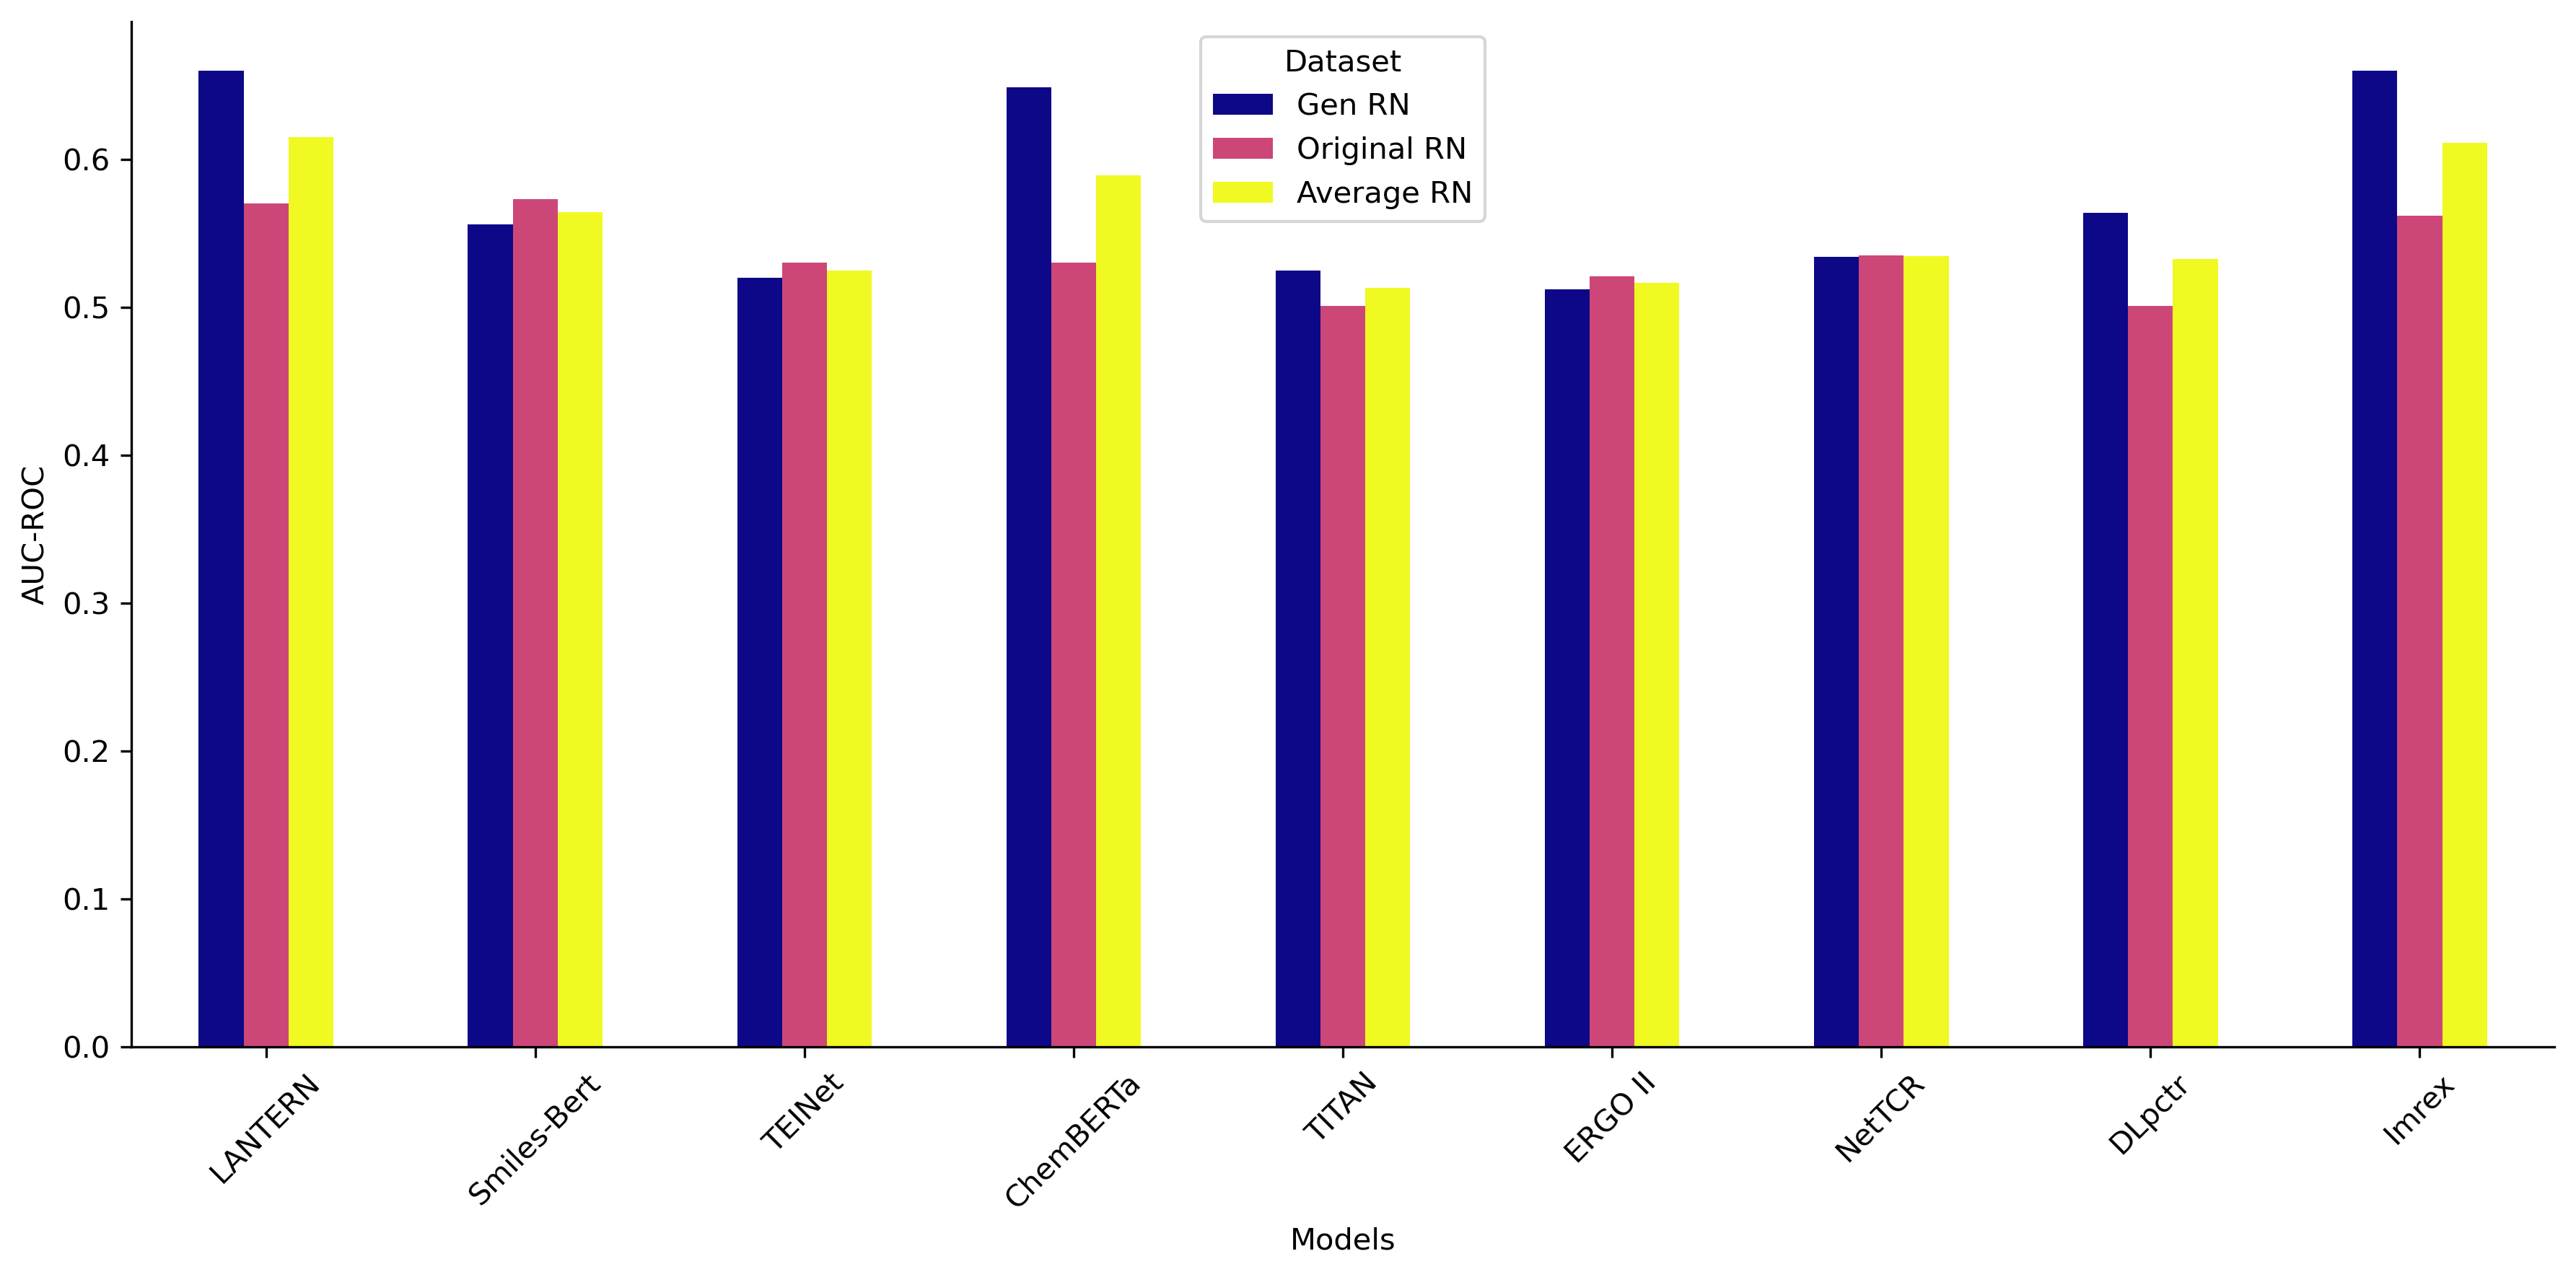

In [3]:
# Plotting two separate figures for NA and RN settings

# 1. Bar chart for AUC-ROC across NA datasets
fig, ax = plt.subplots(figsize=(12, 6), dpi = 300)
auc_roc_df[["Gen NA", "Original NA", "Average NA"]].plot(kind='bar', ax=ax, cmap = "plasma")
# ax.set_title('AUC-ROC Scores across Models for NA Datasets')
ax.set_ylabel('AUC-ROC')
ax.set_xlabel('Models')
ax.legend(title='Dataset')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()

# 2. Bar chart for AUC-ROC across RN datasets
fig, ax = plt.subplots(figsize=(12, 6), dpi = 300)
auc_roc_df[["Gen RN", "Original RN", "Average RN"]].plot(kind='bar', ax=ax, cmap = "plasma")
# ax.set_title('AUC-ROC Scores across Models for RN Datasets')
ax.set_ylabel('AUC-ROC')
ax.set_xlabel('Models')
ax.legend(title='Dataset')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the updated plots
plt.show()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the tables
models = ["LANTERN", "Smiles-Bert", "TEINet", "ChemBERTa", "TITAN", "ERGO II", "NetTCR", "DLpctr", "Imrex"]

# Data for the different metrics across all four datasets
data = {
    "AUC-ROC": {
        "Gen NA": [0.88, 0.659, 0.97, 0.7571, 0.5, 0.613, 0.605, 0.52, 0.685],
        "Gen RN": [0.66, 0.556, 0.52, 0.6485, 0.525, 0.512, 0.534, 0.564, 0.66],
        "Original NA": [0.901, 0.658, 0.97, 0.7314, 0.82, 0.623, 0.593, 0.666, 0.76],
        "Original RN": [0.57, 0.573, 0.53, 0.53, 0.501, 0.521, 0.535, 0.501, 0.562],
    },
    "ACC": {
        "Gen NA": [0.35, 0.702, 0.96, 0.5401, 0.62, 0.665, 0.683, 0.716, 0.448],
        "Gen RN": [0.62, 0.513, 0.37, 0.6142, 0.66, 0.643, 0.524, 0.688, 0.685],
        "Original NA": [0.964, 0.705, 0.95, 0.9717, 0.98, 0.689, 0.602, 0.977, 0.954],
        "Original RN": [0.62, 0.602, 0.41, 0.6007, 0.66, 0.505, 0.511, 0.658, 0.657],
    },
    "F1-Score": {
        "Gen NA": [0.48, 0.811, 0.98, 0.6612, 0.6, 0.702, 0.721, 0.03, 0.593],
        "Gen RN": [0.5, 0.468, 0.51, 0.4882, 0.523, 0.534, 0.609, 0.801, 0.194],
        "Original NA": [0.981, 0.821, 0.98, 0.9853, 0.99, 0.603, 0.498, 0.389, 0.976],
        "Original RN": [0.32, 0.702, 0.5, 0.2263, 0.431, 0.531, 0.509, 0.046, 0.046],
    }
}

# Convert data to DataFrames for easier plotting
auc_roc_df = pd.DataFrame(data["AUC-ROC"], index=models)
acc_df = pd.DataFrame(data["ACC"], index=models)
f1_df = pd.DataFrame(data["F1-Score"], index=models)


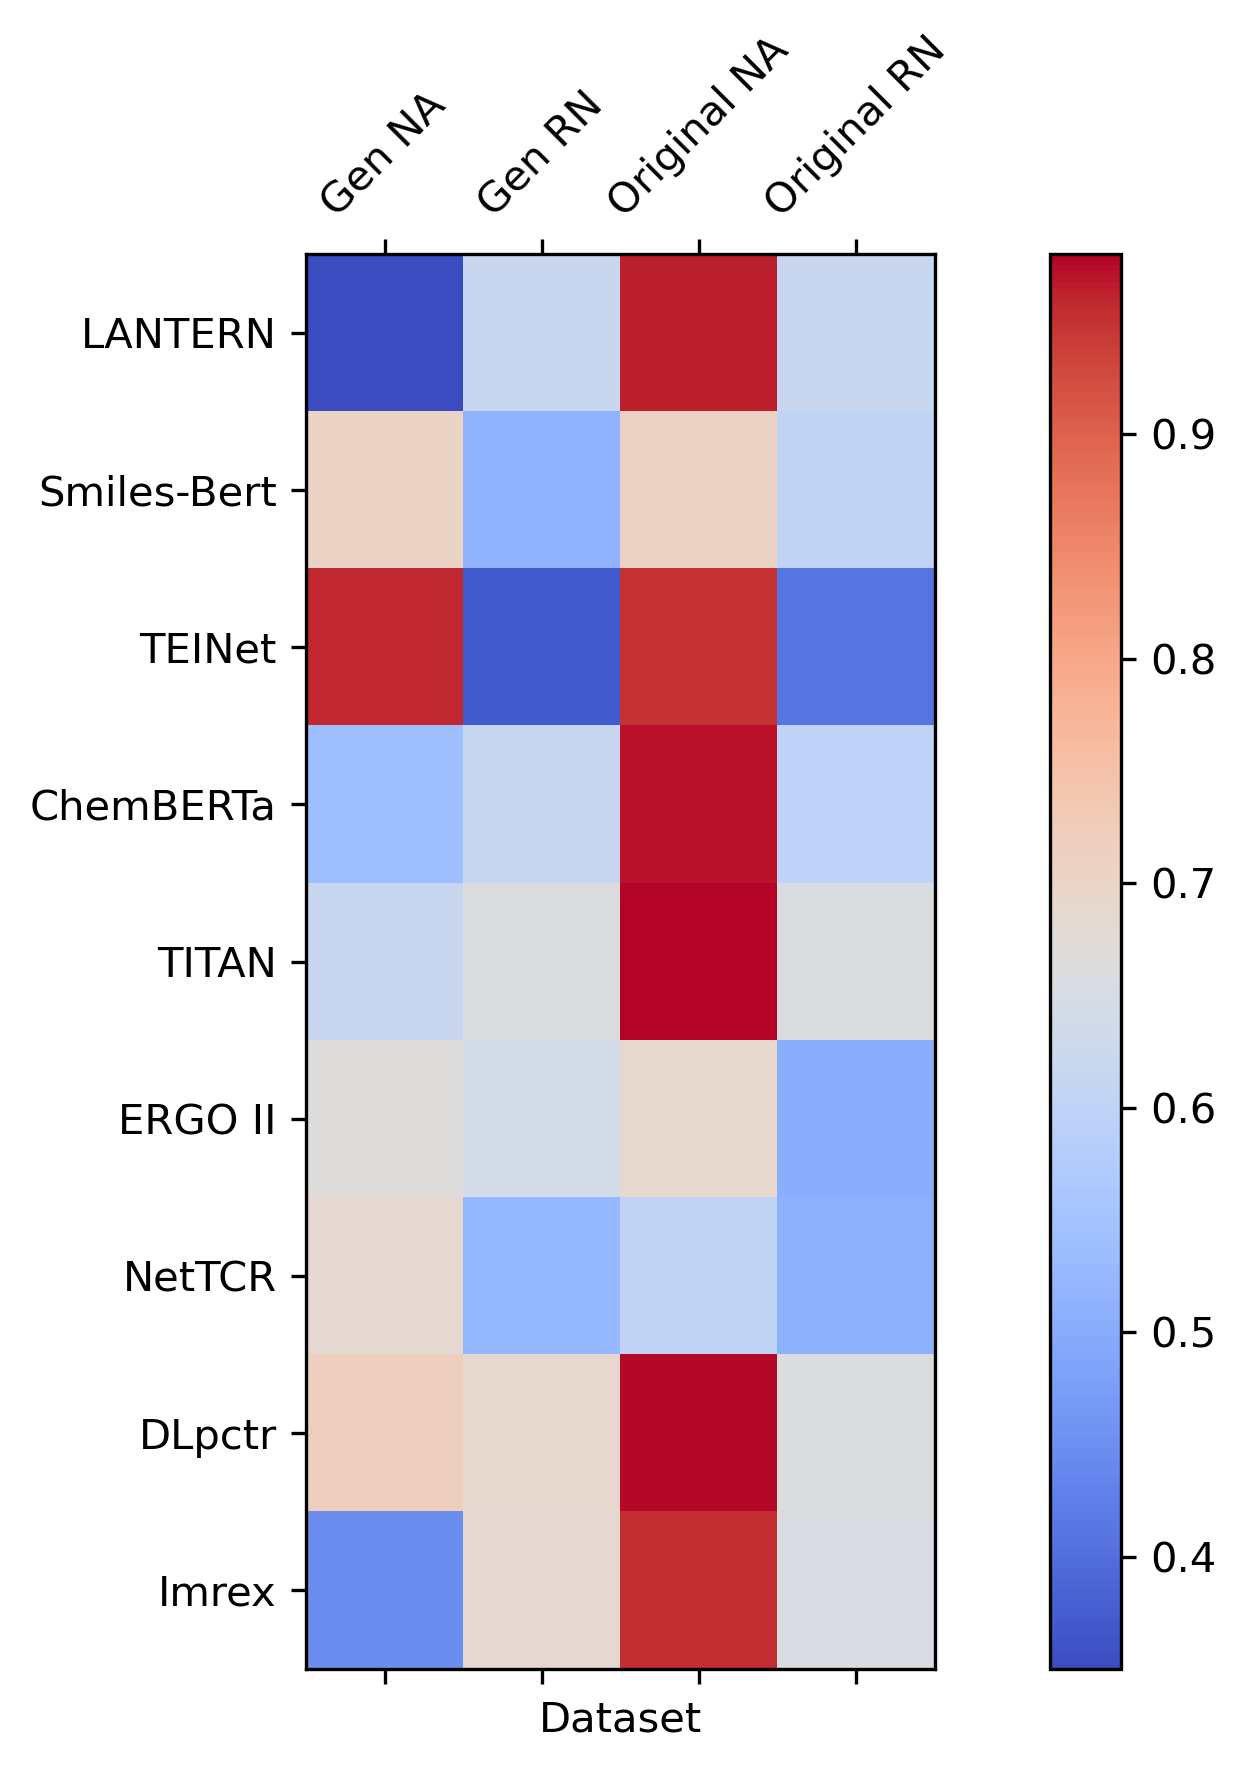

In [5]:
# 2. Heatmap for ACC scores
fig, ax = plt.subplots(figsize=(8, 6), dpi = 300)
cax = ax.matshow(acc_df, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(acc_df.columns)))
ax.set_yticks(np.arange(len(acc_df.index)))
ax.set_xticklabels(acc_df.columns)
ax.set_yticklabels(acc_df.index)
# plt.title('ACC Scores Heatmap')
plt.xlabel('Dataset')
# plt.ylabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()


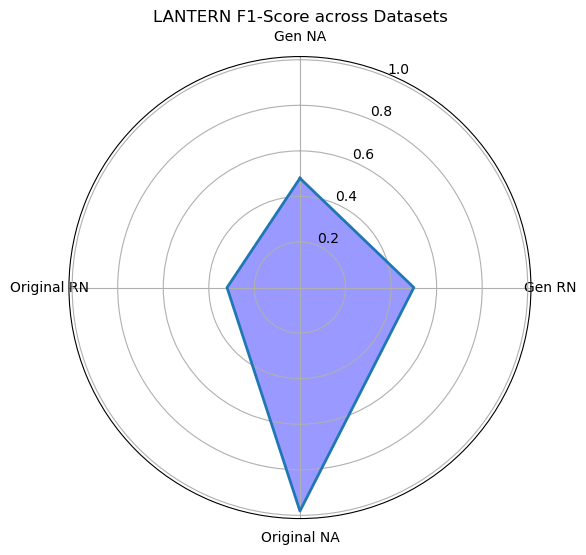

In [6]:

# 3. Radar chart for F1-Score (Example with LANTERN only)
fig = plt.figure(figsize=(6, 6))
categories = list(f1_df.columns)
values = f1_df.loc["LANTERN"].values.flatten().tolist()
values += values[:1]  # Repeat the first value to close the circle

angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.4)

plt.title('LANTERN F1-Score across Datasets')

# Show the plots
plt.show()